# The Role of Viz in Analysis

Plotting is useful for 
- Exploring data: _Understanding the structure of the data is absolutely essential to any analysis._
- Discovering and presenting trends, comparisons, and relationships (results): _Pictures are worth a thousand words._

A common data science work flow:
1. Get data
2. Generate questions (many questions!). [See below.](#what-questions-should-i-ask-what-should-i-plot)
2. Search for answers by visualizing and modeling data
4. Refine question, fix data problem, or ask new question: return to step 2 or 3 and proceed 

Notice: We're in an loop now. **Point being:**

```{admonition} You should be plotting your data A LOT!
:class: warning
For every figure I include in research papers, I've created literally hundreds of figures no one else will ever see. 

"Investigate every idea that occurs to you. Some of these ideas will pan out, and some will be dead ends. As your exploration continues, you will hone in on a few particularly productive areas that you’ll eventually write up and communicate to others." ([Garrett Grolemund and Hadley Wickham](https://r4ds.had.co.nz/exploratory-data-analysis.html))
```


## What questions should I ask / What should I plot?

**A smart way to choose what to plot is to ask questions about your data.** 
- For example, what does the distribution of firm investment rates? What fraction of firms are increasing their investment?[^qinspo] And so on...

**How do you pick which questions to ask?**
- Remember, our goal is to understand new data, so that we can then use that data to learn something. But since you just got the data, asking good questions is hard - you don't know what's in the data in terms of problems or insights. 


[^qinspo]: This subsection borrows heavily from [R4DS](https://r4ds.had.co.nz/exploratory-data-analysis.html).

**What kinds of questions can I ask?** Generally, questions about data fall into two bins:
1. What type of variation occurs *within a* variable? *Ex: Distributions, time trends*
1. What type of variation occurs *between* variables?[^causal] *Ex: Scatterplots, plots-by-group*

[^causal]: Depending on the purpose, it might be important to find out if the relationship is *causal*. Proving that X causes Y is very important in many settings, but outside the scope of this class. 
    

```{tip}
1.  Ask LOTS of questions. Alt: Create lots of plots.
1. After you ask a question and answer it with a plot, ask a new question that follows-up on what you just learned. 
```


## Why plot our data?

I know I just said why above in general terms ("exploring data and presenting analysis") but I want to show you a few classic examples.

### Summary statistics don't show relationships

Anscombe's quartet is four datasets with two variables which have identical means and standard deviation.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # sometimes we want to tweak plots
import numpy as np 

df = sns.load_dataset("anscombe")
df.groupby('dataset').describe() # works, but a lil ugly...
df.groupby('dataset').describe().swaplevel(axis=1)[['mean','std']] # just report means and std

mean                 std          
           x         y         x         y
dataset                                   
I        9.0  7.500909  3.316625  2.031568
II       9.0  7.500909  3.316625  2.031657
III      9.0  7.500000  3.316625  2.030424
IV       9.0  7.500909  3.316625  2.030579

A regressionista says: "$x$ and $y$ all have the 'same relationship': $y = 3 + 0.5*x$"

But... just take one look at the figure below. Is that statement accurate?!

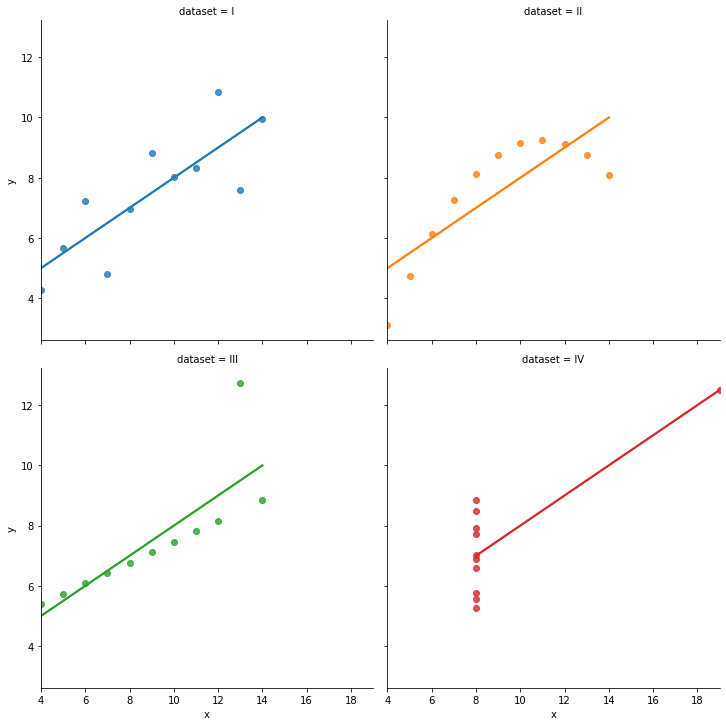

In [2]:
sns.lmplot(x="x", y="y", data=df, ci=None,
           col="dataset", # do the plot once for each dataset
           col_wrap=2,    # only two plots per row
           hue="dataset", # diff color for each dataset
          )
plt.show()

### Finding outliers 

Including them can change your regression coefficients:

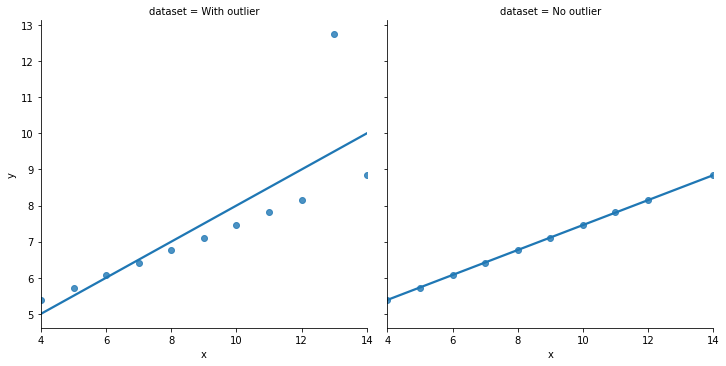

In [3]:
# let's graph dataset 3, with and without the outlier
# so make that dataframe 
temp_df = pd.concat([       # concat takes a list of dataframes, thus the extra brackets
                    df.query('dataset == "III"').assign(dataset='With outlier'),
                    df.query('dataset == "III" & y < 12 ').assign(dataset='No outlier')
                    ])
sns.lmplot(x="x", y="y", data=temp_df, ci=None,
          col="dataset", )
plt.show()

# alternative (easier to write) code
# this will do the same content-wise, but the y-axes differ, so fmt'ing is needed to sync them
# sns.lmplot(x='x',y='y',data=df.query('dataset == "III"'),ci=None)
# sns.lmplot(x='x',y='y',data=df.query('dataset == "III" & y < 12'),ci=None)


### Finding group effects

If you regressed $x$ on $y$ in the following dataset, the relationship would be "clearly" negative...

In [4]:
temp_df = pd.concat([       
                    df.query('dataset == "I"').assign(y=df['y']+20).assign(x=df['x']-20).assign(group="G-1"),
                    df.query('dataset == "I"').assign(y=df['y']+12).assign(x=df['x']-12).assign(group="G-2"),
                    df.query('dataset == "I"').assign(y=df['y']+6).assign(x=df['x']-6).assign(group="G-3"),
                    df.query('dataset == "I"').assign(y=df['y']+0).assign(x=df['x']-0).assign(group="G-4"),
                    ])

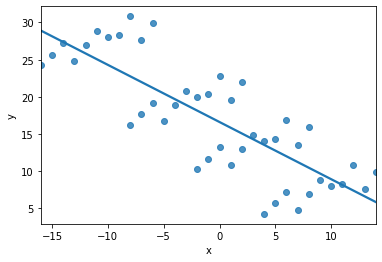

In [5]:
sns.regplot(x="x", y="y", data=temp_df ,ci=None)
plt.show()

... but it should be **positive, taking the groups (colored below) into account:**

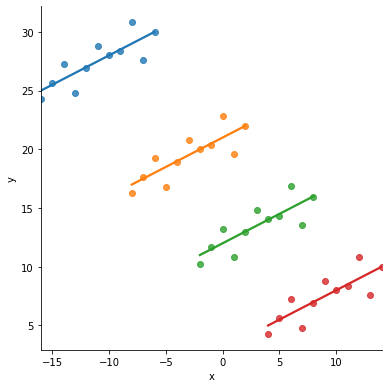

In [6]:
sns.FacetGrid(temp_df, hue='group',height=5.5, aspect=5/5)\
    .map(sns.regplot, "x", "y", ci=None)
plt.show()

## Graphs aren't everything

Visualizations are a powerful and essential tool. 

The [online book version](https://socviz.co/) of "Data Visualization: A practical introduction" by Kieran Healy notes that

> Illustrations like these demonstrate why it is worth looking at data. But that does not mean that looking at data is all one needs to do. Real datasets are messy, and while displaying them graphically is very useful, doing so presents problems of its own. \[As we will see next lecture\], there is considerable debate about what sort of visual work is most effective, when it can be superfluous, and how it can at times be misleading to researchers and audiences alike. 

Just like with tables of numbers, graphs deliberately simplify things to help use peer into the cloud of data. Still, we will not automatically get the right answer to our questions just by looking at these summaries. This is why we will cover more rigorous methods to uncover statistical relationships later in the course.

Yet, summary stats and graphs are an absolutely necessary starting point.